# Climate Factors, Plant Growth, and Plant Development

## Learning Objectives
- Understand the relationship between climate factors and plants
- Understand the basics of solar radiation
- Evaluate critically the concept of radiation use efficiency
- Evaluate critically the concept of thermal time known as growing degree day
- Explore `Cropbox` for handling weather data for model simulations

## Readings
- Goudriaan J, Van Laar HH (1994) Climatic factors. In 'Modelling Potential Crop Growth Processes: Textbook with Exercises.' (Eds J Goudriaan and HH Van Laar) pp. 29-49. (Springer Netherlands: Dordrecht) (https://doi.org/10.1007/978-94-011-0750-1_3)
- (Section 4) Kim S-H, Hsiao J, Kinmonth-Schultz H (2019) Advances and improvements in modeling plant processes. In 'Advances in Crop Modelling for a Sustainable Agriculture.' Ed. K Boote) pp. 3-43. (Burleigh-Dodds: Cambridge, UK) (https://doi.org/10.19103/AS.2019.0061.01)
- Yun K, Kim S-H (2023) Cropbox: a declarative crop modelling framework. in silico Plants 5(1), diac021 (https://doi.org/10.1093/insilicoplants/diac021)

### Further readings
- Loomis RS, Amthor JS (1999) Yield potential, plant assimilatory capacity, and metabolic efficiencies. Crop Science 39(6), 1584-1596 (https://doi.org/10.2135/cropsci1999.3961584x)
- Johnson IR, Thornley JHM (1985) Temperature dependence of plant and crop process. Annals of Botany 55(1), 1-24 (https://doi.org/10.1093/oxfordjournals.aob.a086868)





## Reading Questions
1. What is the atmospheric transmissivity, why is it important for modeling plant productivity, and how can it be estimated using measured solar radiation?
2. What is radiation use efficiency (RUE) and what may be cons and pros of applying the RUE approach for modeling plant growth and production?
3. What is growing degree days (GDD) and what may be cons and pros of applying the GDD approach for plant development?

## Introduction
The atmospheric and soil conditions dictate plant growth and health. A reasonable whole-plant model should be able to mimic how plants respond and interact with the environment. Here, we will review some of the fundamentals of biometeorology (or agrometeorology) relevant for modeling plant growth. Specifically, we will look at:

1. Weather Variables and Data
2. Radiation Basics
3. Light and Plant Growth: Radiation Use Effciency (RUE)
4. Temperature and Plant Development: Thermal Time Approaches
5. Working with Weather Data in `Cropbox`
6. Homework Problems

Let's clarify the use of key terms, concepts, and definitions first. We would feed `weather` data to run a plant growth model. Weather data can come in many different forms and intervals. Most crop models, for example, run on a daily time-step and would require weather data organize in daily values (e.g., mean, max, and min temperatures). Other models including most of models I work with run on houly intervals. The hourly models are useful to study and represent the dynamic response patterns over a diurnal course that will be missed in daily models. For trees that live centuries, however, a longer interval such as monthly time-step may be more appropriate unless investigating dynamc physiological responses that are happening at a much smaller and finer scale in space and time is of interest.

While weather represents the short-term changes in the atmospheric environment, `climate` refers to long-term measures of the atemospheric events that are often expressed in 30 year averages known as `climate normals`. Agricultural researchers often use crop simulation models to study the impacts of climate change on crop yield and plant productivity in the future. To use a crop simulation model to predict crop productivity in the future, one would first need to obtain the projected future climate data from climate models in coarser time and spatial scales, then process the data through statisal or dynamic downscaling and interpolation in both time (e.g., from monthly to daily and hourly) and space to run plant models at the desired scale.   

## 1. Weather Variables and Data

Weather variables that are commonly monitored in weather stations include air temperature, solar radiation, wind speed, precipitation, and relative humidity. These are critical environmental variables that dictate plant life. Most plant growth models take these weather variables as input to drive plant growth. 

Other atmospheric variables that are important for plants but often missing from weather station data include $\mathrm{CO_2}$ and $\mathrm{O_2}$. The atmospheric concentrations of $\mathrm{CO_2}$ ([$\mathrm{CO_2}$]) is particularly important for plants because that's the food they assimilate to sugar through photosynthesis but the majority of weather stations do not monitor [$\mathrm{CO_2}$] likely because it is not a typical variable that influences or changes short-term weather whereas the global climate has been changing at an unprecedented rate because of rapidly rising atmospheric [$\mathrm{CO_2}$]. The [$\mathrm{CO_2}$] varies considerably diurnally, seasonally, and spatially as well and is a critical variable that is missing from data collected by most weather stations. Many earlier crop models did not include $\mathrm{CO_2}$ as a driving variable to simulate plant growth largely because it was assumed to be stable and also it was lacking from the weather data. But most modern plant models include [$\mathrm{CO_2}$] as a key input variable; when locally measured values are unavailabe the global average can be used (i.e., 427 $\mathrm{\mu mol}\ \mathrm{mol^{-1}}$ measured at [Mauna Loa Observatory](https://gml.noaa.gov/ccgg/trends/)). Similary, $\mathrm{O_2}$ concentrations are assumed to be at 21% (v/v) at the sea level. 

### Weather and Climate Data Sources ###
Listed below are some of the websites that host weather and climate data in the US and around the world that I have found useful. 
- Washington State University's AgWeatherNet (<https://weather.wsu.edu/>)
- California Dept of Water Resources' CIMIS (<https://cimis.water.ca.gov/>)
- Cornell University's NEWA for eastern and mid-west states (<https://newa.cornell.edu/>)
- NOAA's Climate Data Online (<https://www.ncei.noaa.gov/cdo-web/>): Daily, monthly, seasonal, and yearly historical weather data and climate normals
- Oregon State University's PRISM Climate Data (<https://prism.oregonstate.edu/>): Good place to get climate normals
- CCAFS Climate (<https://www.ccafs-climate.org/>): Spatially downscaled GCM climate projection data for agricultural applications

## 2. Radiation Basics

### Solar Radiation ###
Solar radiation reaching the top of the atmosphere on earth is quite stable and can be represented by the solar constant ($S_0$ = 1367 $\mathrm{W/m^{2}}$). Because light travels and behaves as both particles and waves, radiatve energy ($e$ in Joule (J)) transfered by the packets of photons depend on their wavelength according to:

- light energy and wavelength

$$
e = \frac{hc}{\lambda}
$$

where $h$ is Planck's constant (6.63 x $10^{-34} \mathrm{Js}$), $c$ is the speed of light (3.0 x $10^{8}$ m/s in vacuum), and the $\lambda$ is the wavelength of the photon. The amount of photons falling onto unit surface area is expressed as photon flux density in moles of photons per unit area over a time interval (i.e., $\mathrm{\mu mol}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$). This allows us to convert moles of photons to radiative energy (J) and vice versa for different wavelengths (i.e., colors) of light coming from different sources (e.g., natural sunlight, LED, High Pressure Sodium and other artificial lightings). See Chapters 10 and 11 of [Campbell and Norman (1998)](https://doi.org/10.1007/978-1-4612-1626-1) for more information.

### Photosynthetically Active Radiation (PAR) and Photosynthetic Photon Flux Density (PFD)
Most solar radiation is short-wave radiation (280 to 4000 nm) with about 45% of energy coming as photosynthetically active radiation (PAR; 300-700 nm) and approx. 50% in near infrared (NIR; 700-2500 nm). Solar radiation is usually measured by silicon-cell pyranometers that sense a portion of the solar spectrum (e.g., 300 - 1100 nm; ~80% of total) but calibrated to approximate the total solar radiation. PAR is expressed in energy unit as $\mathrm{W/m^2}$ where $\mathrm{W = J/s}$. The light energy is transfered by packets of photons with respect to their wavelength as shown above. The amount of photons coming specifically in PAR waveband is termed photosynthetic photon flux density (PPFD or PFD). Conversion between PAR ($\mathrm{W/m^2}$) and PFD ($\mathrm{\mu mol}\ \mathrm{m^{-2}}\ \mathrm{s^{-1}}$) is possible and the conversion factor varies with the spectrum of light source. For PAR from natural sun light, the median wavelength is 550 nm and the conversion between PAR and PFD is approximated to be **0.218 J/μmol or 4.6 μmol/J** as we saw in Ex 1. 

A useful metric in horticulture is **Daily light integral (DLI)**. DLI represents the amount of photons in PAR per day per unit area ($\mathrm{mol\ m^{-2}\ d^{-1}}$). In other words, DLI is a sum of instantaneous PFD ($\mathrm{μmol\ m^{-2}\ s^{-1}}$) over a day.

<div class="alert alert-warning">
If figures/tables are not rendered correctly, make sure your notebook is `trusted` by running `Trust Notebook` operation found in `View` menu (third icon from the top on the toolbar located left-hand side) then `Activate Command Palette`. You can easily find this menu by typing in "trust" in the search box there.
</div>

In [ ]:
using Cropbox

`Cropbox` manual and tutorials: https://cropbox.github.io/Cropbox.jl/stable/

### Ex 1 ###
Calculate the energy (J) transfered by 1) a single green photon traveling in the wavelength of 550 nm and 2) a packet of $\mathrm{\mu mol}$ of the green photons.

In [ ]:
using Unitful

Using `Unitful` package, we can simply indicate the unit for each quantity and the package will take care of the most unit conversion and simplifcations for us. We use a pipe operator `|>` to force a conversion to the unit we want. We are creating a `let` block here which should end with `end`. In `Julia`, a `let` block contains the scope of variables and operations within.

In [ ]:
const Avogadro = 6.022140857e23
let
    h = 6.63e-34u"J*s"; c = 3.0e8u"m/s"; λ = 550u"nm"
    e = h*c/λ  |> u"J"
    e_mol = e*Avogadro |> u"MJ"
end    
    println("energy/photon is ", e)
    println("energy/mole of photons is ", e_mol)
#end   

### Reading and ploting weather data ###
Most weather stations monitor weather conditions in sub-hourly intervals (e.g., 15 minutes) and can provide data in different time steps (e.g., hourly, daily, monthly). Many crop models run on daily time steps. Here, we will take a look at daily weather data of a corn field collected between May 15 and September 30, 2002 from the South Farm of USDA-ARS Beltsville Agricultural Reesarch Center (BARC). It includes year, day of year (jday), daily *mean* solar radiation (rad; $\mathrm{W/m^2}$), daily average (Tavg), maximum (Tmax), and minimum (Tmin) temperatures (°C), rainfall (mm), and calendar date.    


In [ ]:
using CSV, DataFrames # CSV package helps with reading and writing CSV (comma separated value) and other plain text files
df1 = CSV.read("MD_Beltsville_2002-daily.csv", DataFrame) |> unitfy
unitfy(df1)

Let's try plotting temperature variables over time here.

In [ ]:
?plot;

Check how to use `plot` function. Remove `;` to see the output. `?` in front invokes in-notebook help. By default, we are using `plot` function built in `Cropbox` package. There are other ploting packages in Julia using the same name `plot` function such `Plot` or `Gadfly`. To eliminate ambiguity we can specicy the package by `Cropbox.plot` or `Gadfly.plot`.

In [ ]:
plot(df1.date, [df1.Tmax, df1.Tavg, df1.Tmin]; kind = :line)

### Ex 2 ###
Applying the radiation basics we just disussed, let's do the following using the daily weather data from Beltsville, MD. 
1. Plot daily mean solar radiation (`rad`; $\mathrm{W/m^2}$) over the entire period.
2. Convert daily mean solar radiation (`rad`) into daily total solar radiation (`rad_tot`) in $\mathrm{MJ\ m^{-2}\ d^{-1}}$ and plot `rad_tot`. 
3. Convert total daily solar radiation ($\mathrm{MJ\ m^{-2}\ d^{-1}}$) into daily light integral (DLI) in $\mathrm{mol\ m^{-2}\ d^{-1}}$, add `DLI` a new column, and plot it.

In [ ]:
#Ex 2-1
plot(df1, :date, :rad; kind = :line)

In [ ]:
using DataFrames

Using `Dataframes` package along with `Unitful` package, we can simply add a column named `rad_tot` and specify the unit for the new column. The `Unitful` package will then handle the unit conversion internally without us doing any manual conversion here. The `.` in front of `|>` means the pipe operation to unitfy the values applies to all rows in the dataframe; this is called *dot vectorization* which is a unique feature of Julia.

In [ ]:
# Ex 2-2a: unit conversion from daily mean readiation to daily total radiation in MJ m^-2 d^-1. Unitful will take care of this conversion.  
df1.rad_tot = df1.rad .|> u"MJ/m^2/d^1";
plot(df1, :date, :rad_tot; kind = :line)

For Ex 1-3, we assume that 45% of total solar radiation is in PAR and 4.6 μmol/J and convert it to the proper unit. 

In [ ]:
#Ex 2-3: Convert daily total solar radiation to DLI. Here we need to inclde spectrum specific information for the conversion.
# We assume 45% of radiation is PAR and PAR to PFD conversion factor is 4.6 umol/J.
df1.DLI = df1.rad_tot * 0.45*4.6u"μmol/J" .|> u"mol/m^2/d";

In [ ]:
#Ex 2-3: Plot DLI over time
plot(df1, :date, :DLI; kind = :line)

### Solar geometry: Here comes the sun ###
Although the radiation from the sun represented by the solar constant ($S_c$ = 1367 $\mathrm{W/m^2}$) is fairly constant except with the cyclic variations due to sunspot activities, the actual solar radiation incident on the earth's surface ($S$) varies with time and location and the variations are predictable. The incident solar radiation varies diurnally and seasonally because of earth's orbital eccentricity and rotation, by locations with respect to latitude and longitude, and also due to the atmospheric transmissivity ($\tau$) which depends on cloudiness. The cyclic variabilities associated with the solar geometry can be approximated by a set of equations as summarized below ([Goudriaan and van Laar, 1994; Chapter  3](https://doi.org/10.1007/978-94-011-0750-1_3)):

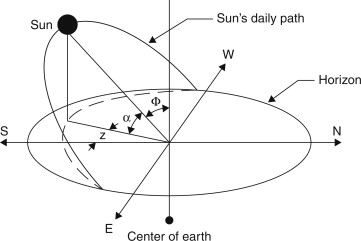
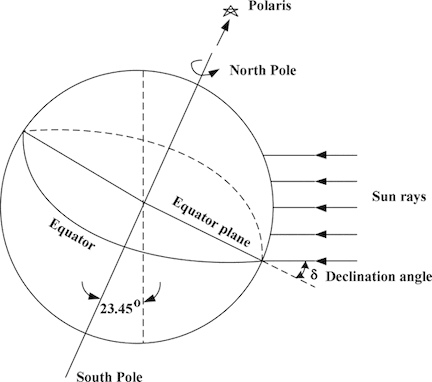  
Figure 1. Geometric features for determining sun's position over the course of day and season (Image sources: [Kalogirou (2022)](https://doi.org/10.1016/B978-0-12-819727-1.00001-7) and [Karafil et al. (2015)](https://doi.org/10.1109/ELECO.2015.7394517))

### Relevant equations ###
Shown below are relevant equations for approximatiing sun's position at a given time and location adopted from Chapter 4 of Goudriaan and van Laar (1994).There are other formulations for this purpose with varying precisions (e.g., Chapter 11 of Campbell and Norman, 1998) but we use this set of formula for its brevity. Many plant and crop models often include a weather/climate module that implements the solar geometry and other algorithms handling weather variables. For example, see the [leaf gas exchange model](https://github.com/cropbox/LeafGasExchange.jl/blob/main/src/sun.jl) developed using `Cropbox`.  

- Incident solar radiation ($S$; $\mathrm{W/m^2}$) 
$$ 
    S_0 = S_c \cdot [1.0 + 0.033 \cos{(2\pi (t_d -10.0)/365)]} \cdot \sin{\beta} \\
    S = S_0  \cdot \tau
$$
- Solar elevation ($\sin{\beta}$) and related geometry: 
$$ 
    \begin{align}
        \sin{\beta} &= a + b \cdot \cos{2\pi(t_h - 12)/24)} \\
        a &= \sin\lambda \sin\delta ;  
        b = \cos\lambda \cos\delta \\
        \sin\delta &= - \sin{(\pi \cdot 23.45/180)} \cos{(2\pi(t_d+10.0)/365)} \\
        \cos\delta &= \sqrt{1.0-{\sin\delta}^2} \\
        \int \sin\beta \,dt &= a \cdot d + (\frac{24b}{\pi}) \cos{\left[\left(\frac{d}{12} - 1.0\right) \cdot \frac{\pi}{2}\right]}
    \end{align}
$$ 
- Day length ($d$):
$$ d = 12.0 \cdot \left[ 1.0 + \frac{2.0}{\pi} \arcsin{\frac{a}{b}}\right] $$
- Solar azimuth ($\alpha$):
$$
 \alpha = \pm \arccos{\left(\frac{\sin{\beta} \sin{\lambda} - \sin{\delta}}{\cos\beta \cos\delta}\right)}
$$

Where $\beta$ is sun's height or solar elevation, $\delta$ is sun's declination with respect to the equator plane, $\lambda$ is the latitude of location in degrees, $t_d$ is day of year, and $t_h$ is solar time in hours. $a$ represents the seasonal shift of sun's position with respect to the equator and $b$ relates to the seasonal changes in solar height

### Ex 3. Solar radiation in Seattle now.
Let's do some calculations to find out how much light we are getting these days in Seattle.
1. Calculate the daylength, sunrise, and sunset in Seattle, WA today and compare your estimated sunrise and sunset times with a weather app of your choice. 
2. What time is it now and what is the incident solar radiation outside the atmosphere ($S_0$) coming toward Seattle right now?
3. Assuming a clear day with $\tau$ of 0.7, what is the solar radiation incident on the ground right now?
4. What is the current solar radiation at the CUH according to AgWeatherNet (https://weather.wsu.edu/)?
5. What is the actual atmospheric transmissivity right now? Looking outside the window, does this value seem reasonable? 

In [ ]:
using Dates
# hour(now(localzone())) #This might give an incorrect result based on how the JupyterHub server time is set up.
# localzone() # check the local time zone of the computer you are using
hour(now(tz"America/Los_Angeles"))

In [ ]:
# Ex 3: solution
let
    Sc = 1367u"W/m^2"
    λ = deg2rad(47.608)
    t_d = dayofyear(today())
    t_h = hour(now(tz"America/Los_Angeles"))
    τ = 0.7
    sinδ = -sin(π*23.45/180)*cos(2π*(t_d + 10.0)/365.0)
    cosδ = √(1.0-sinδ^2)
    a = sin(λ)*sinδ; b = cosδ*cos(λ)
    sinβ = a + b*cos(2π*(t_h - 12.0)/24)
    d = 12.0*(1.0+2.0/π*asin(a/b))
    sunrise = 12.0 - d/2
    sunset = sunrise + d
    S0 = Sc*sinβ*(1.0 + 0.033*cos(2π*(t_d-10.0)/365)) # solar radiation at the top of atmosphere
    S = S0*τ
    S_obs = 370u"W/m^2"
    τ = S_obs/S0

    println( "=======================================")
    println( " Ex 3. Solar Radiation in Seattle Now ")
    println( "=======================================")
    println( "1. Today's daylength is: ", d, " hrs, sunrise time is ", sunrise, " hr, and sunset would be ", sunset, "hr." )
    println( "2. Now is ", Dates.format(now(tz"America/Los_Angeles"), "yyyy-mm-dd HH:MM"), " and the estimated incident solar radiation at the top of the atmosphere is: ", S0, " W/m^2.")
    println( "3. If the atmospheric transmissivity was 0.7, the solar radiation at the ground level would be: ", S, " W/m^2.")
    println( "4. Current solar radiation reading of the AgWeatherNet weather station at CUH is: ", S_obs, " W/m^2.")
    println( "5. Actual atmospheric transmissivity based on the measurement is: ", τ, ".")
end

## 3. Light and Plant Growth: Radiation Use Efficiency (RUE)

As people say, plants eat light to grow although I think it is more correct to say that plants eat $\mathrm{CO_2}$ with their countless mouths (stomata). Anyways, the concept of radiation use efficiency proposed by [Monteith (1977)](https://doi.org/10.1098/rstb.1977.0140) is useful in this regard. It is also simple and elegant. Based on the thermodynamic efficiency of a crop canopy to convert the light energy ($\mathrm{MJ \cdot m^{-2}}$ in short-wave solar radiation) into the chemical energy to produce carbohydrates forming crop biomass ($\mathrm{g m^{-2}}$ in dry matter), it has been proposed that RUE remains conserved for different crops and environmental conditions. Later works provided theoretical underpinnings of this approach [(Loomis, 1999)](https://doi.org/10.2135/cropsci1999.3961584x). The RUE approach can be summarized as:

- Eqn 3a: RUE for plant growth
\begin{equation}
    \label{eq:RUE}
    \Delta W = [\epsilon\cdot I_0\cdot f_{\mathrm{solar}}]\Delta t
\end{equation}
 
Where $W$ is biomass accumulated per unit area ($\mathrm{g m^{-2}}$), $I_0$ represents the irradiance in short-wave solar radiation (PAR and NIR wavebands) and is usually available from weather station data in ($\mathrm{W m^{-2}}$ or in $\mathrm{MJ m^{-2} d^{-1}}$). $\epsilon$ is a crop specific coefficient for its radiation use efficiency (RUE) ($\mathrm{g \cdot MJ^{-1}}$), $f_{\mathrm{solar}}$ is the fraction of the solar radiation intercepted by the canopy. $\Delta t$ is the time step, usually in $\mathrm{d^{-1}}$. $f_{\mathrm{solar}}$ can be approximated by:

- Eqn 3b: Fraction of solar radiation intercepted by crop
\begin{equation}
    \label{eq:f_solar}
    f_{\mathrm{solar}} = 1 - e^{-kL}
    \end{equation}
 
Where $k$ is extinction coefficient that describes the rate of light attenuation inside a canopy and $L$ is the leaf area index of the canopy. Typical values for the RUE coefficient ($\epsilon$) are 1.5 and 2.3 $\mathrm{g \cdot MJ^{-1}}$ for C3 and C4 crops, respectively [(Loomis, 1999)](https://doi.org/10.2135/cropsci1999.3961584x). A typical value for $k$ may range between 0.5 and 0.8 with.

- Eqn 3c: RUE for total biomass accumulation
\begin{equation}
    \label{eq:RUE_sum}
    W = \sum_{}^{d_\mathrm{hv}}[\epsilon\cdot I_0\cdot f_{\mathrm{solar}}]
\end{equation}

This equation sums the daily plant growth to give the final biomass at harvest as the growing season ends and represents the net total biomass accumulated over the entire growing season. $d_{hv}$ represents growing season length represented by the days from planting to harvest. For other ecosystems (e.g., forest, desert), this quantity will be equivalent to the net primary productivity (NPP) for a given year. In both cases, the leaf area index (LAI) needs to be known as a parameter or an input variable, which is often estimated using remote sensing data. Once final biomass accumulated over the season is known, the harvested crop yield ($Y_h$) can be obtained if harvest index ($h$) of the crop is known. The $HI$ for a highly domesticated and bred grain crop (e.g., corn, rice, wheat) may be up to 50\% or greater. 

\begin{equation}
    \label{eq:Yield}
    Y_h = W\cdot HI
\end{equation}

While the RUE approach for modeling crop or ecosystem productivity is elegantly simple and effective, the assumed linear relationship between the radiation intercepted by the canopy and biomass production may not be conserved in all environments and plant conditions.

### Ex. 3. A simple radiation use efficiency model for corn biomass and yield ###
As discussed, the radiation (or light) use efficiency (RUE or LUE) is a simple but useful concept in plant growth modeling that many crop models are based on. In a nutshell it states that plant growth is proportional to the total radiation it receives as canopy. In a study by ([Sinclair and Horie T, 1989](https://doi.org/10.2135/cropsci1989.0011183X002900010023x)), the RUE value has been esimated to be 1.7 g of biomass/MJ of solar radiation for C4 maize crop, while for rice, a C3 crop, the estimate was 1.4 g/MJ. First, some simplifying **assumptions** that are likely unrealistic but necessary: 1) **the leaf area index (LAI)** of the canopy stayed at **3.0** throughout the season, 2) the canopy light **extinction coeffcient ($\textbf{k}$)** was **0.6**, and 3) **daily short-wave solar radiation ($I_0$)** was constant at **25 $\mathrm{MJ~d^{-1}}$** for the entire corn growing season of **100 days** in **Ames, Iowa**. With this information, answer the following questions. 

1. Estimate the cumulative biomass per unit area ($\mathrm{g\ m^{-2}}$) of this maize cultivar at harvest assuming that LAI = 3.0 and k = 0.6 for the canopy throughout the grwoing season.
2. Planting density was 8 plants per $\mathrm{m^{2}}$. What is the final biomass per plant?
3. What would be the grain yield (t/ha) of this corn crop if the harvest index is 50%?
4. Do these estimates look reasonable to you? What are the pros and cons of this modeling approach? 
5. What is the weakest aspect or most problematic of this particular modeling exercise in your opinion? What can be done to overcome that?

In [ ]:
# Ex3-1. 
    ϵ = 1.7u"g/MJ"
    L = 3.0
    I0= 20u"MJ/m^2/d"
    k = 0.6
    d_final = 100u"d"
    f_s = 1 - exp(-k*L)
    PD = 8u"1/m^2"
    biomass_m2= ϵ*f_s*I0*d_final
# Ex 3-2
    plant_biomass = biomass_m2/PD
    a = (biomass_m2, plant_biomass)

println("1) Cumulative biomass/m^2 is ", a[1], " and 2) this translates to biomass/plant of ", a[2]) 

In [ ]:
# Line below registers a new unit for corn yield as bushels/acre. 
# This unit is commonly used for yield reporting in the US. 
# For corn, one bushel is defined as 56 pounds (lbs). A bushel of wheat is 60 lbs, and for rice it is 45 lbs which also changes with milling.
module MyUnits; using Unitful; @unit cbu "cbu" cornBushel 56u"lb" false; end
Unitful.register(MyUnits);

#Ex 3-3
HI = 0.5 # harvest index. the proportion of harvestable portion (kernels) per total biomass of a whole-plant
t_ha = HI*biomass_m2 |> u"Mg/ha"
bu_acre = t_ha |> u"cbu/ac"
yield = (ton_ha = t_ha, bushel_acre = bu_acre) 

println("3a) grain yield in metric unit is ", yield[1], 
        " and 3b) this translates to bushels/acre as: ", yield[2]) 

#### Discussion 
Let's compare our estimates with recent corn yield from counties in Iowa (<https://www.nass.usda.gov/Statistics_by_State/Iowa/Publications/County_Estimates/2024/IA-CtyEst-Corn-02-24.pdf>). What do you think? Did our model do a decent job of estimating potential yield? What are the strengths and drawbacks of the model? Are assumptions we made resonable? What are or should be the state variables in this approach? For reference, table shown below illustrates the mean daily radiation for each moth over two decades in Ames, Iowa ([Hodges, 1984](https://scholarworks.uni.edu/cgi/viewcontent.cgi?article=1123&context=pias)).

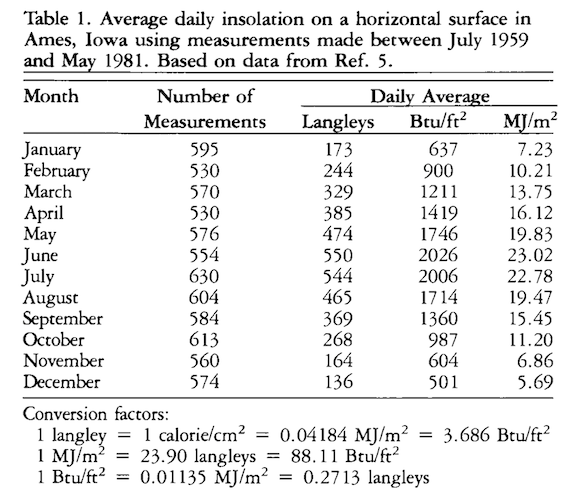

## 4. Temperature Drives Plant Development: Thermal Time Approaches
We hear a lot about phenolgy these days and how climate change is shifting the phenology of plants and animals. [Phenology](https://budburst.org/phenology) is a study of developmental changes in biological organisms. Temperature drives the progression of developmental phases in plants and thus is a major driving variable in most if not all phenology models. The majority of materials covered in this section is available in chapter 1 by Kim et al. in [Boote (2019)](https://doi.org/10.1201/9780429266591). Included in this note is a summary of concepts and contexts. While there are other environmental and physiological factors that influence plant phenology including photoperiod, light integral, water deficit, and hormonal relations, these factors are not explicitly addressed here. See [Johnson and Thonrley (1985)](https://doi.org/10.1093/oxfordjournals.aob.a086868) for more detailed review of temperature dependence of plant processes. 

### Growing Degree Days (GDD)
You might have heard the terms like growing degree days (GDD), thermal units, heat units, heat sums, temperature sums, and thermal-time that are used to relate the rate of plant or insect development to temperature. They are largely synonymous. The concept of thermal-time or thermal-units derives from the long-standing observation and assumption that timing of development is primarily driven by temperature in plants and the relationship is largely linear. The linear relationship is generally held true over normal growing temperatures that are bracketed by the base temperature ($T_b$) and optimal temperature ($T_{opt}$). Many existing crop models and tree growth models use thermal-unit approaches (e.g., GDD) for modeling phenology with some modifications to account for other factors like photoperiod, vernalization, dormancy, and stress. The growing degree days (GDD) is defined as the difference between the average daily air temperature ($T$) and the base temperature below which the developmental process stops. The bigger the difference in a day, the faster the development takes place up to a certain optimal temperature ($T_{opt}$). The  cumulative GDD (cGDD) since the growth initiation (e.g., sowing, imbibition for germination) is then calculated by:

\begin{equation}
    \label{eq:GDD}
    \mathrm{GDD}(T) = \max \{ 0, \min \{ T, T_{opt} \} - T_b \}
\end{equation}

\begin{equation}
    \label{eq:cGDD}
    \mathrm{cGDD} = \sum_i^n { \mathrm{GDD}(T_i)} = \sum_i^n {\max \{ 0, \min \{ T_i, T_{opt} \} - T_b \}}
\end{equation}

Recently, a similar concept called Killing Degree Days (KDD) was coined to describe the damaging effects of extreme heats on crops ([Butler and Huybers, 2015](https://doi.org/10.1088/1748-9326/10/3/034009)). KDD accumulated when the daily maximum temperature ($T_\mathrm{max}$) exceeded $T_\mathrm{opt}$.
  
\begin{equation}
    \label{eq:KDD}
    \mathrm{KDD}(T_\mathrm{max})= \min \{0, T_\mathrm{max}-T_\mathrm{opt} \}
\end{equation}


Using `Cropbox` let's create a system to calculate GDD and cGDD.

In [ ]:
"Growing degree days and killing degree days calculator"
@system DegreeDays begin
    T:  temperature                              ~ preserve(parameter, u"°C")
    Tb: base_temperature                         ~ preserve(parameter, u"°C")
    To: optimal_temperature                      ~ preserve(parameter, u"°C")
    GDD_rating: maturity_growing_degree_rating   ~ preserve(parameter, u"K")
    
    GD(T, Tb, To): growing_degree => begin
        min(T, To) - Tb
    end ~ track(min = 0, u"K")

    GDD(GD): growing_degree_day => begin
        GD / 1u"d"
    end ~ track(u"K/d")

    cGDD(GDD): cumulative_growing_degree_day ~ accumulate(u"K")

    KD(T, To): killing_degree => begin
        T - To
    end ~ track(min = 0, u"K")

    KDD(KD): killing_degree_day => begin
        KD / 1u"d"
    end ~ track(u"K/d")

    cKDD(KDD): cumulative_killing_degree_day ~ accumulate(u"K")
end

In [ ]:
@system DDController(DegreeDays, Controller)

In [ ]:
# prepare a configuation to simulate and visualize
dd_config = @config (
    Clock => (;
        step = 1u"d",
    ),
    DegreeDays => (;
        Tb = 10.0,
        To = 30.0,
        GDD_rating = 1500,
    ),
)

Let's create a plot showing how GDD relates to mean daily temperatures (T). Try changing paremter values in the configuration and replot. How would KDD behave if added to the plot?

In [ ]:
visualize(DDController, :T, [:GDD];
    config = dd_config,
    xstep = :0 => :T => 0:40,
    kind = :line,
)

## 5. Working with Weather Data as Driving Variables in `Cropbox` ###
Weather data are the driver of plant growth models. In `Cropbox`, we can create a system to manage weather variables, time, and other routine tasks. Let's create a system called `Weather` that can be used as a container that holds a collection of weather variables we discussed here. Since we are not going to make this system do any actual work but use just as data container we do not need to `mixin` controller (this means we won't be able to instantiate it by itself as we have seen in Lab 01). These weather variables change dynamically over time and can be provided as time series data by weather stations. We will use this `system` to collect the daily weather data we read and plotted above.

### Working with daily weather data

In [ ]:
@system Weather_daily begin
    calendar(context)             ~      ::Calendar
    t(calendar.date): date        ~ track::date

    data:                source_data     ~ provide(parameter, index = :date, init = t)
    Tavg:                avg_temperature ~ drive(from = data, by = :Tavg, u"°C")
    Tmin:                min_temperature ~ drive(from = data, by = :Tmin, u"°C")
    Tmax:                max_temperature ~ drive(from = data, by = :Tmax, u"°C")
    solrad:              solar_radiation ~ drive(from = data, by = :rad_tot, u"MJ/m^2/d^1")
    DLI:            daily_light_integral ~ drive(from = data, by = :DLI, u"mol/m^2/d^1")    
    T(Tavg):             temperature  => Tavg   ~ track(u"°C") 
    
end

`Weather_daily` is a mix-in system for loading up weather variables from an external data source. It relies on variables with kind of `provide` and `drive`. For handling time variable in calendar date format (YYYY-MM-DD), we also deploy a `Calendar` system included with Cropbox.

- `provide` *provides* a data frame with given index (`index`) starting from an initial value (`init`). Since we're going to provide a data frame using a configuration, the variable is tagged `parameter`.

- `drive` makes a *driving* variable from a data source (`from`) with a given column name (`by`). The data source is often supplied by `provide`.

- `Calendar` is like `Clock` embedded in `Context` system that provides `time` and `step` variables, but in the type of `ZonedDateTime` (`datetime` in Cropbox).

```julia
@system Calendar begin
    init ~ preserve::datetime(extern, parameter)
    last => nothing ~ preserve::datetime(extern, parameter, optional)
    time(t0=init, t=context.clock.time) => t0 + convert(Cropbox.Dates.Second, t) ~ track::datetime
    date(time) => Cropbox.Dates.Date(time) ~ track::date
    step(context.clock.step) ~ preserve(u"hr")
    stop(time, last) => begin
        isnothing(last) ? false : (time >= last)
    end ~ flag
    count(init, last, step) => begin
        if isnothing(last)
            nothing
        else
            # number of update!() required to reach `last` time
            (last - init) / step
        end
    end ~ preserve::int(round, optional)
end
```

We will use the same weather data from the 2002 corn experiment we've seen earlier. Recall that in this experiment seeds were planted on May 15, 2002 and plants were harvested in mid September. Also remember that we stored the data as a dataframe: `df1` and added a few more variables such as `rad_tot` and `DLI` .

We create a configuration that contain infomation and data needed to run dynamic simulations as the simulation clock moves through the time period defined in `Calendar` part of the configuration. 

In [ ]:
c1 = @config (
    :Calendar => (
        :init => ZonedDateTime(2002, 5, 15, tz"America/New_York"),
        :last => ZonedDateTime(2002, 9, 30, tz"America/New_York"),
    ),
    :Clock => (;
        :step => 1u"d",
    ),
    :Weather_daily => (;
        :data => df1, # provide 'df1' dataframe we worked with previously as source data
    ),
)

`Calendar` system embedded in `Weather_daily` above accepts `init` and `last` parameters in the type of `ZonedDateTime` for representing timestamps with proper time zone support. We need time zone because the default time resolution in Cropbox is by an hour and things can become tricky when it comes to handling daylight savings. To simplify our exercises, we will use daily time step for the most part of simulations here. `Calendar` also provides `stop` variable that taps on the interval between `init` and `last` to inform `simulate()` when simulation should be done.

In [ ]:
@system WeatherViewer(Weather_daily, Controller)

We created a system called `WeatherViewer` with `Weather_daily` and `Controller` systems mixed in so that it can be instantiated. Let's create an instance of this system called `w` with `c1` configuration we defined.

In [ ]:
w1 = instance(WeatherViewer, config = c1)

`w1` has a number of different variables inside it. The weather file we examined and stored as `df`' dataframe previously is now embeded in this instance of `Weather_daily` mixin system as `data`. Let's take a look at the embeded weather data here just for the first 10 records.

In [ ]:
w1.data.value[1:10, :];

We can run a `simulation` of this weather data. There's really nothing to run here but a key difference between this step and just viewing the data above is that the `Clock` is going through `data` step by step dynamically according to `Calendar` instructions. We will save the output as dataframe called `s1` that contains `t` and `T`, `DLI`, and `solrad` (not 'rad_tot').

In [ ]:
s1=simulate(WeatherViewer;
    config = c1,
    stop = "calendar.stop",
#    snap = u"7d",
    index = :t,
    target = [:T, :solrad, :DLI],
);

In [ ]:
plot(s1, :t, :T; kind = :line)

#### Can we do something more interesting that just plotting weather variables?  ####
While it is nice to be able to run something like this, this system doesn't really do much other than containing the weather data for each time step. Let's create a system that does a little more to accumulate data for weather variables of interest over time. This is a useful functionality in plant growth modeling becuase plants respond to cumulative temperatures for their development or to cumulative light for their growth. The growth of plants is an integrative response of environmental conditions the plants experience. These relationships are useful especially when they are linear and form the basis of growing degree days (GDD) and light (or radiation) use efficiency (LUE or RUE) models we just saw.

Let's create a new system called `WeatherSum` that will calculate and store sums of weather variables over a period. We will calculate growing degree days with base temperature ($T_b$) of 10 °C and optimum temperature of ($T_o$) of 30°C.  We will also calculate cumulative solar radiation during the simulation period. 

In [ ]:
@system WeatherSum(WeatherViewer) begin   
    GDD(T): growing_degree_day_K => begin
        (min(T,30.0u"°C") - 10.0u"°C") / 1u"d"
    end ~ track(min = 0, u"K/d")

    cGDD(GDD):                         cumulative_GDD  ~ accumulate(u"K")
    solrad_sum(solrad):        sum_of_solar_radiation  ~ accumulate(u"MJ/m^2")
    GDD_rating:        maturity_growing_degree_rating => 1500  ~ preserve(u"K", parameter)
end

Note here that we are converting temperature in Celcius (C) to Kelvin (K) degrees. The reason is that `Unitful` package doesn't allow temperature calculations in C or F but requires to convert C to K to get temperature differences. See <https://painterqubits.github.io/Unitful.jl/stable/#Usage-examples>.

But wait, didn't we create a system to calcuate GDD and cGDD already? Yes, we did. So we can just reuse the system as `mixin` here. Just make sure that `GrowingDegreeDay` system is mixed in first before `WeatherViewer` which includes `Controller` the last mixin.

In [ ]:
@system WeatherSum(DegreeDays, WeatherViewer) begin
    solrad_sum(solrad):        sum_of_solar_radiation  ~ accumulate(u"MJ/m^2")
end

In [ ]:
#s1=simulate(WeatherSum; config = @config(c1 + gdd_config), stop = "calendar.stop")
s1=simulate(WeatherSum; config =(c1, dd_config), stop = "calendar.stop")

### Ex. 4. Determining Corn Harvest Date after Maturity based on GDD ###
As mentioned earlier, this weather data set is from a research field in Beltsville, MD where corn was growing in 2002. Commercial corn hybrids are labeled with their maturity rating to indicate their harvest timing. Early maturity hybrids have lower values and late maturity hybrids have higher values. Assuming the corn cultivar growin in this field had the maturity rating of 1500K (~ 2700F) to reach [black layer stage](https://www.pioneer.com/us/agronomy/kernel-black-layer-formation.html) with based temperature of 10 $^\circ$C and optimal temperature of 30 $^\circ$C. Based on this information, estimate the date at which this corn cultivar would be ready for harvest in this field.

In [ ]:
plot(s1, :t, [:cGDD, :GDD_rating]; kind = :line)

In [ ]:
# Look at the simulation results closely to find when exactly cGDD meets GDD_rating to determine harvest timing
filter(:cGDD => x -> (1450u"K" < x < 1550u"K"), s1) 

#### How reasonable are our modeling results?
We probably should check if our results are indeed resonable or at least get an idea of how bad or off they are. We can do this by comparing our results with that of a crop decision support tool  prepared for growers in the corn belt at <https://hprcc.unl.edu/agroclimate/cligrow/#>. Here we assume that we used a hybrid with 111 days to maturity that matches the maturity rating of the hybrid that we used in our exercises.

### Working with hourly weather data in `Cropbox` ###
In `Cropbox` the default time step is hourly. That is because the physiological processes vary dynamically over a day. Capturing these dynamics is important because physiological and biochemical responses to light, temperature, and other environmental variables are often non-linear. Plant growth models running on daily or coarser time step oftem assume linear responses of plant growth and development to light and temperature. We have seen the examples in RUE and GDD models previously. The assumed linear relationships are likely to break in extreme weather conditions (e.g., high emperatures causing heat stress, saturating light). On the other hand, a downside of plant growth models at hourly or finer intervals is that they impose a greater computation load and take longer to run. This is particularly true for tree or forest growth models that run from decades to centurires in hourly time step. Another consideration is the availability and quality of weather data for a desired location and frequency. More oftren than not, weather stations have missing data for sensor failure and other reasons and the missing values need to be gap filled before they can be used for running plant growth models.

There is a weather station at UW Center for Urban Horticulture (CUH) that is maintained by the AgWeatherNet (<https://weather.wsu.edu/>). We will work with hourly weather data (file: UW-CUH_2014-2021.csv) downloaded from the weather station. This dataset includes weather data from 2014 to 2021 formatted to include weather data collected for 8 years from 2014 to 2021 with varibles inlcuded in the `Weather_hourly` system we create later.

First, some housekeeping. The cell below includes code to take care of datetime formatting, indexing, and duplicate times due to day light saving in the US locations. It includes a function called `loadwea` to load a CSV (comma separated values) file into a dataframe. We will call this function to read a weather file in CSV (or other delimited) format to `provide` a dataframe that can be used to `drive` plant growth modeling. Beside this fact, we can ignore other details in this cell.

In [ ]:
using Dates
using TimeZones

datetime_from_julian_day_WEA(year, jday, time::Time, tz::TimeZone, occurrence) =
    zoned_datetime(Date(year) + (Day(jday) - Day(1)) + time, tz, occurrence)
datetime_from_julian_day_WEA(year, jday, tz::TimeZone) = datetime_from_julian_day_WEA(year, jday, "00:00", tz)
zoned_datetime(dt::DateTime, tz::TimeZone, occurrence=1) = ZonedDateTime(dt, tz)
zoned_datetime(dt::DateTime, tz::VariableTimeZone, occurrence=1) = ZonedDateTime(dt, tz, occurrence)

using CSV
using DataFrames: DataFrames, DataFrame

loadwea(filename, timezone; indexkey=:index) = begin
    df = CSV.File(filename) |> DataFrame
    df[!, indexkey] = map(r -> begin
        occurrence = 1
    # We will check if a time is duplicated, possibly due to day light saving and flag with occurrence of 2     
        i = DataFrames.row(r)
        if i > 1
            r0 = parent(r)[i-1, :]
            r0.time == r.time && (occurrence = 2) 
        end
        datetime_from_julian_day_WEA(r.year, r.jday, r.time, timezone, occurrence)
    end, eachrow(df))
    df
end

In [ ]:
# open weather data using 'loadwea' function we just defined to import it as dataframe named 'df2'
tz = tz"America/Los_Angeles"
df2 = loadwea("./UW-CUH_2014-2021.csv", tz);

In [ ]:
#This cell chops the CUH weather data by year and save them as separaate files.
# for yr in 2014:2021
#         d0=filter([:year] => x -> x == yr, df2)
#         d0 = (d0[!,[:year, :jday, :time, :Tair, :RH, :Wind, :SolRad, :Rain]])    
#         CSV.write("./UW-CUH_" * string(yr) * ".csv", d0, overwrite=true)
# end

We filter year 2021 data to work with as an example. 

In [ ]:
df2021 = filter([:year] => x -> x == 2021, df2);

In [ ]:
@system Weather_hourly begin   
    calendar(context)                       ~ ::Calendar
    t(calendar.time): datetime        ~ track::datetime

#    data ~ provide(init= calendar.time, parameter)
    data ~ provide(init= t, index = :index, parameter)

    solrad:   solar_radiation ~ drive(from=data, by=:SolRad, u"W/m^2")
    RH:     relative_humidity ~ drive(from=data, by=:RH, u"percent")   
    T:            temperature ~ drive(from=data, by=:Tair, u"°C")
    Wind:          wind_speed ~ drive(from=data, by=:Wind, u"m/s")
    Rain:            rainfall ~ drive(from=data, by=:Rain, u"mm")    
end    

We define `WeatherViewer2` as mixin system of `Weather_hourly` and `Controller`. 

In [ ]:
@system WeatherViewer_hr(Weather_hourly, Controller) begin
end

In [ ]:
@look WeatherViewer_hr

Let's create a new configuration `c2` for 2021 CUH hourly data.

In [ ]:
c2 = @config (
    :Calendar => (
        :init => ZonedDateTime(2021, 1, 1, tz"America/Los_Angeles"),
        :last => ZonedDateTime(2021, 12, 31, tz"America/Los_Angeles"),
        ),
    :Weather_hourly => (;
        :data => df2021,
    ),    
    :Clock => (;
        :step => 1u"hr",
     ),
)

Create an instance of `WeatherViewer` system called `w2` using `c2` configuration

In [ ]:
s2 = simulate(WeatherViewer_hr, config = c2, stop = "calendar.stop");

In [ ]:
plot(s2, :t, :solrad)

In [ ]:
visualize(WeatherViewer_hr, "calendar.time", :solrad;
    config = c2,
    stop = "calendar.stop",
    kind = :line,
    xlim = (Date(2021,7,1), Date(2021,7,7)),
)

In [ ]:
@system WeatherSum_hr(DegreeDays, WeatherViewer_hr) begin   
    solrad_sum(solrad):        sum_of_solar_radiation  ~ accumulate(u"MJ/m^2")
end


In [ ]:
@look WeatherSum_hr

In [ ]:
c3 = @config (c2,
    :Calendar => (
        :init => ZonedDateTime(2021, 5, 15, tz"America/Los_Angeles"),
        :last => ZonedDateTime(2021, 9, 15, tz"America/Los_Angeles"),
        ),        
    :WeatherSum_hr => (
        Tb = 10.0, # 50F
        To = 30.0, # 86F
        GDD_rating = 1500, # Black Layer GDD in F: 2745 with a common corn cultivar with days to maturity rating of 113 days in Mid-West 
                           # See: https://hprcc.unl.edu/agroclimate/cligrow/#
        ),
)

In [ ]:
s3 = simulate(WeatherSum_hr; config = c3, stop = "calendar.stop");

### Ex 5. Do this on your own in class or elsewhere.
Explore how different climate factors (e.g., solar radiation, temperature, preciptation, wind, etc) changes in Seattle over time (e.g., in different time period, seasons, and years) and  plot them.

## 6. Homework Problems ##

### Homework 1. Can we grow feed corn in Seattle?: Application of a growing degree day model ###
If you are a gardener, you might have heard peple saying we don't have enough heat units in 
seattle to grow crops like tomato. Is it really true? Curiously, we don't see a lot of feed corns growing in Puget Sound. Aside from the land price being so high, let's check if climate is conducive for growing crops like corn. In `Ex.4` we ran the growing degree  model with daily weather data from Beltsville, MD for a corn hybrid with maturity rating of 1500K,  base temperature of 10.0 $^\circ$C, and optimal temperature of 30.0 $^\circ$C. Estimate the date at which this corn cultivar would be ready for harvest if it were grown at CUH in 2021 if planted on May 15 and discuss your findings. Use the same cultivar characteristics to work on this problem for Seattle weather data.

1. Evaluate whether and when the commercial corn hybrid we used in `Ex.4` will mature to black layer stage if it were grown under Seattle weather in 2021. 

2. Pick another year of your chose from the Seattle weather data and do the same as part 1.

3. Discuss if and how the Seattle climate is conducive for growing feed corn for production. Provide plots and other modeling ouputs that you can use to support your points. 

### Homework 2. Model corn growth in Seattle based on a RUE model running on hourly weather data ###
We now estimate plant growth using the RUE model we used in `Ex.3`. Recall that for maize as a C4 crop, the RUE value is esimated to be 1.7 g of biomass/MJ of solar radiation ([Sinclair and Horie T, 1989](https://doi.org/10.2135/cropsci1989.0011183X002900010023x)).

1. Estimate the total biomass accumulated per unit area ($\mathrm{g\ m^{-2}}$) of this maize cultivar grown in Seattle weahter in 2021 and harvested on September 15, 2021. Assume that all other conditions and charateristics were the same as in `Ex.3`. 
2. Planting density was 8 plants per $\mathrm{m^{2}}$. What is the final biomass per plant?
3. Does the estimate for biomass accumulation look reasonable to you? Will this corn cultivar reach its maturity to produce harvestable yield? What other factors do you think are important for answering this question but missing from the information provided?

### Homework 3
Were there enough heat sums for the corn crop to reach maturity as indicated in the GDD rating? Where there enough radiation sums for corn plants accumulate sufficient biomass? How would you compare and explain the matcy or mismatch between the RUE based growth and GDD based developmen of corn plants as predited by these two modeling apporaches for Seattle weather? How would you improve these models? 

To check our results are indeed resonable, we can compare with that of a crop decision support tool  prepared for growers in the corn belt at <https://hprcc.unl.edu/agroclimate/cligrow/#> using 111 days to maturity to match maturity rating of the hybrid that we used in our exercises.